In [73]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from copy import deepcopy
import random
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles
import csv
import cairosvg

# Download Dataset - Repeated Code

In [13]:
PUBCHEM_DATASET_CONFIG = {
    'bbbp': {'path': 'bbbp/BBBP.csv', 'task': 'clf', 'target_list': ["p_np"]},
    'tox21': {'path': 'tox21/tox21.csv', 'task': 'clf', 'target_list': [
            "NR-AR", "NR-AR-LBD", "NR-AhR", "NR-Aromatase", "NR-ER", "NR-ER-LBD", 
            "NR-PPAR-gamma", "SR-ARE", "SR-ATAD5", "SR-HSE", "SR-MMP", "SR-p53"
        ]},
    'clintox': {'path': 'clintox/clintox.csv', 'task': 'clf', 'target_list': ['CT_TOX', 'FDA_APPROVED']},
    'hiv': {'path':'hiv/HIV.csv', 'task': 'clf', 'target_list': ["HIV_active"]},
    'bace': {'path': 'bace/bace.csv', 'task': 'clf', 'target_list': ["Class"]},
    'sider': {'path': 'sider/sider.csv', 'task': 'clf', 'target_list': [
            "Hepatobiliary disorders", "Metabolism and nutrition disorders", "Product issues", 
            "Eye disorders", "Investigations", "Musculoskeletal and connective tissue disorders", 
            "Gastrointestinal disorders", "Social circumstances", "Immune system disorders", 
            "Reproductive system and breast disorders", 
            "Neoplasms benign, malignant and unspecified (incl cysts and polyps)", 
            "General disorders and administration site conditions", "Endocrine disorders", 
            "Surgical and medical procedures", "Vascular disorders", 
            "Blood and lymphatic system disorders", "Skin and subcutaneous tissue disorders", 
            "Congenital, familial and genetic disorders", "Infections and infestations", 
            "Respiratory, thoracic and mediastinal disorders", "Psychiatric disorders", 
            "Renal and urinary disorders", "Pregnancy, puerperium and perinatal conditions", 
            "Ear and labyrinth disorders", "Cardiac disorders", 
            "Nervous system disorders", "Injury, poisoning and procedural complications"
        ]},
    'muv': {'path': 'muv/muv.csv', 'task': 'clf', 'target_list': [
            'MUV-692', 'MUV-689', 'MUV-846', 'MUV-859', 'MUV-644', 'MUV-548', 'MUV-852',
            'MUV-600', 'MUV-810', 'MUV-712', 'MUV-737', 'MUV-858', 'MUV-713', 'MUV-733',
            'MUV-652', 'MUV-466', 'MUV-832'
        ]},
    'freesolv': {'path': 'freesolv/freesolv.csv', 'task': 'reg', 'target_list': ["expt"]},
    'esol': {'path': 'esol/esol.csv', 'task': 'reg', 'target_list': ["measured log solubility in mols per litre"]},
    'lipo': {'path': 'lipophilicity/Lipophilicity.csv', 'task': 'reg', 'target_list': ["exp"]},
    'qm7': {'path': 'qm7/qm7.csv', 'task': 'reg', 'target_list': ["u0_atom"]},
    'qm8': {'path': 'qm8/qm8.csv', 'task': 'reg', 'target_list': [
            "E1-CC2", "E2-CC2", "f1-CC2", "f2-CC2", "E1-PBE0", "E2-PBE0", 
            "f1-PBE0", "f2-PBE0", "E1-CAM", "E2-CAM", "f1-CAM","f2-CAM"
        ]},
    'qm9': {'path': 'qm9/qm9.csv', 'task': 'reg', 'target_list': ['mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve', 'cv']}
}

In [106]:
def highlight_scaffold(smiles, dataset_name, index, size=(400,200)):
    molecule = Chem.MolFromSmiles(smiles)
    scaffold = Chem.MolFromSmiles(MurckoScaffoldSmiles(smiles))
    drawer = rdMolDraw2D.MolDraw2DSVG(size[0], size[1])
    match = molecule.GetSubstructMatch(scaffold)
    drawer.DrawMolecule(molecule, highlightAtoms=match)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace('svg:','')
    cairosvg.svg2png(bytestring=svg, write_to=f'scaffold_images/{dataset_name}_{index}_scaffold.png', output_width=400, output_height=200)
    return molecule


In [94]:
def get_random_smiles_from_dataset(dataset_name):
    pubchem_path = '/home/ks877/L45Project/SSLMolAug/datasets/pre_training/pubchem/'
    csv_path = f"{pubchem_path}{PUBCHEM_DATASET_CONFIG[dataset_name]['path']}"
    smiles_data, _ = read_smiles(dataset_name, csv_path)
    random_idx = random.randint(0, len(smiles_data))
    print(f'from {dataset_name} dataset, sample {random_idx}')
    smiles = smiles_data[random_idx]
    return smiles, random_idx

from bbbp dataset, sample 847


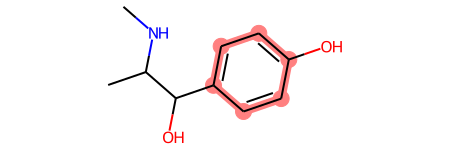

In [110]:
dataset_name = 'bbbp'
smiles, random_idx = get_random_smiles_from_dataset(dataset_name)
highlight_scaffold(smiles, dataset_name, random_idx)